## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [5]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

In [6]:
# #check the first 5 rows of dataframe
# car_price_df.head(5)
# #check the last 3 rows of the dataframe
# car_price_df.tail(5)
# #get a quick summary of the dataframe
# car_price_df.info()
# #get the descriptive stats of the datframe
car_price_df.describe()
#check all the categorical data
categorical_data = car_price_df.select_dtypes(include = ['object'])
categorical_data.columns

#check all the data types 
data_types = car_price_df.dtypes
data_types
#check the number of unique data types
num_data_types = car_price_df.dtypes.nunique()
num_data_types

3

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

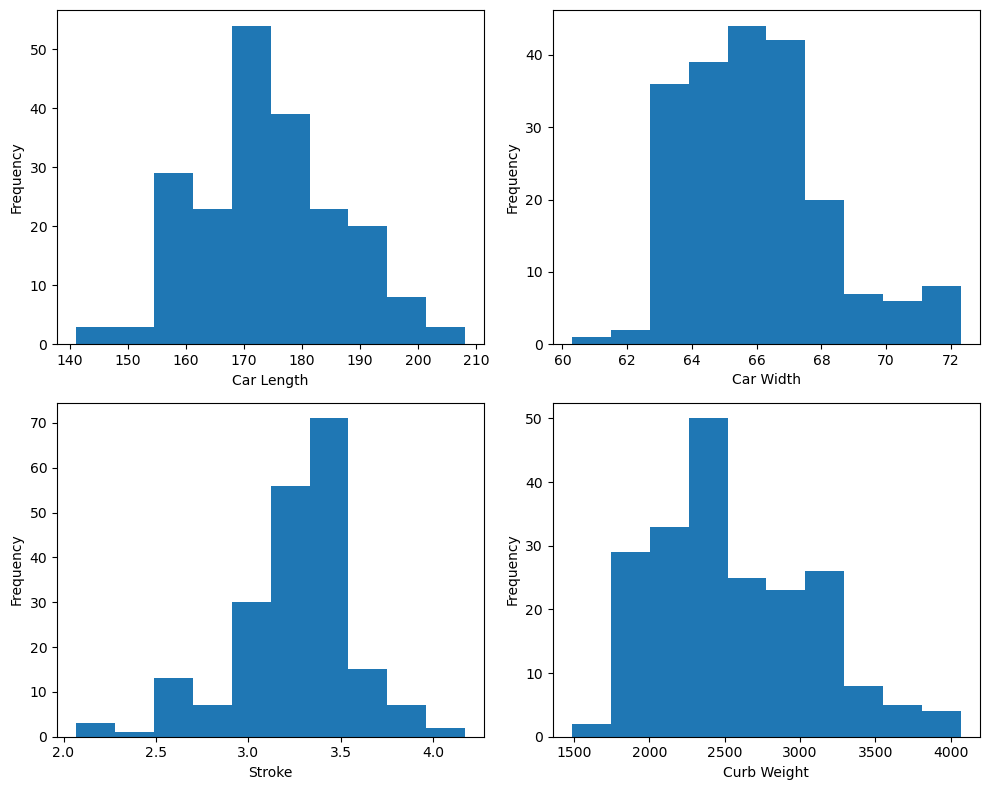

In [44]:
carlength = car_price_df['carlength']
carwidth = car_price_df['carwidth']
stroke = car_price_df['stroke']
curbweight = car_price_df['curbweight']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(carlength)
axs[0, 0].set_xlabel("Car Length")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(carwidth)
axs[0, 1].set_xlabel("Car Width")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(stroke)
axs[1, 0].set_xlabel("Stroke")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(curbweight)
axs[1, 1].set_xlabel("Curb Weight")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


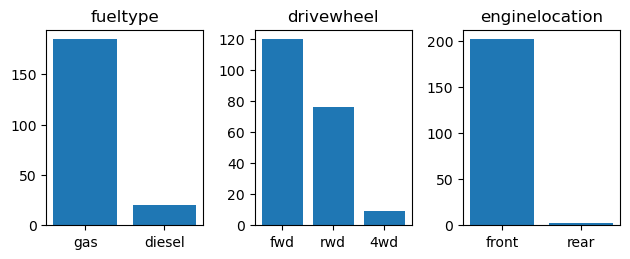

In [45]:
### Code here
features = car_price_df[['fueltype','drivewheel','enginelocation']]
num_feature = len(features.columns)
for i, feature in enumerate(features.columns):
    plt.subplot(2, num_feature, i+1)
    cnt = features[feature].value_counts()
    plt.bar(cnt.index, cnt.values)
    plt.title(feature)
plt.tight_layout()
plt.show()


<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

In [46]:
car_price_df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

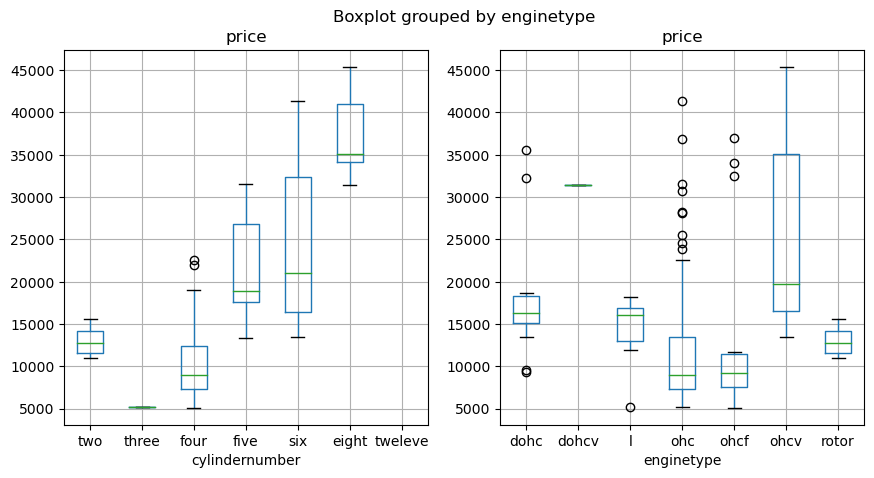

In [47]:
### Code here

# sort the values in cylinderNumber
cylinder_order = ['two', 'three','four','five','six','eight','tweleve']
car_price_df['cylindernumber'] = pd.Categorical(car_price_df['cylindernumber'], categories=cylinder_order, ordered=True)
sorted_df = car_price_df.sort_values(by='cylindernumber')

#plot the boxplots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sorted_df.boxplot(column='price', by='cylindernumber', ax=ax[0])
car_price_df.boxplot(column='price', by='enginetype', ax=ax[1])
plt.show()



<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [48]:
#### Comment here
carlength_skewness = car_price_df['carlength'].skew()
carwidth_eiskewness = car_price_df['carwidth'].skew()
stroke_skewness = car_price_df['stroke'].skew()
curbweight_skewness = car_price_df['curbweight'].skew()

print("The carlength_skewness of the distribution is:", carlength_skewness)
print("The carwidth_eiskewness of the distribution is:", carwidth_eiskewness)
print("The stroke_skewness of the distribution is:",stroke_skewness)
print("The curbweight_skewness of the distribution is:",curbweight_skewness)


# carlength: A skewness value of 0.1559 indicates that the distribution of the carlength feature is relatively symmetric.

# carwidth: A skewness value of 0.904 indicates that the distribution of the carwidth feature is positively skewed. This means that there are more values on the positive side of the mean than on the negative side of the mean.

# stroke: A skewness value of -0.6897 indicates that the distribution of the stroke feature is negatively skewed. This means that there are more values on the negative side of the mean than on the positive side of the mean.

# weight: A skewness value of 0.681 indicates that the distribution of the weight feature is positively skewed. This means that there are more values on the positive side of the mean than on the negative side of the mean

The carlength_skewness of the distribution is: 0.1559537713215604
The carwidth_eiskewness of the distribution is: 0.904003498786254
The stroke_skewness of the distribution is: -0.6897045784233837
The curbweight_skewness of the distribution is: 0.681398189052588


------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
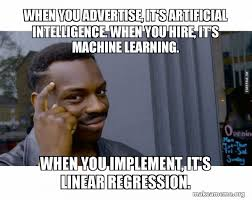



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [30]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0, 4, size = 100)
y = 7 * X - 8 + epsilon


To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

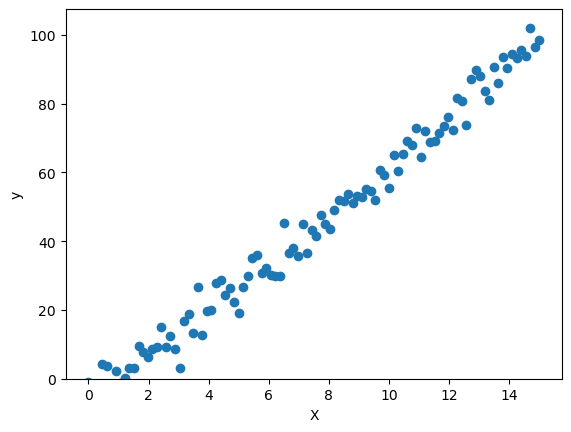

In [31]:
### Code here
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel('y')
plt.ylim(bottom = 0)
plt.show()

#### Comment here
the linear relationship between X and y can be visualized as a straight line with a slope of 7 and a y-intercept of -8. The noise in the data can be seen as deviations from this line.

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [7]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

Text(0, 0.5, 'Price')

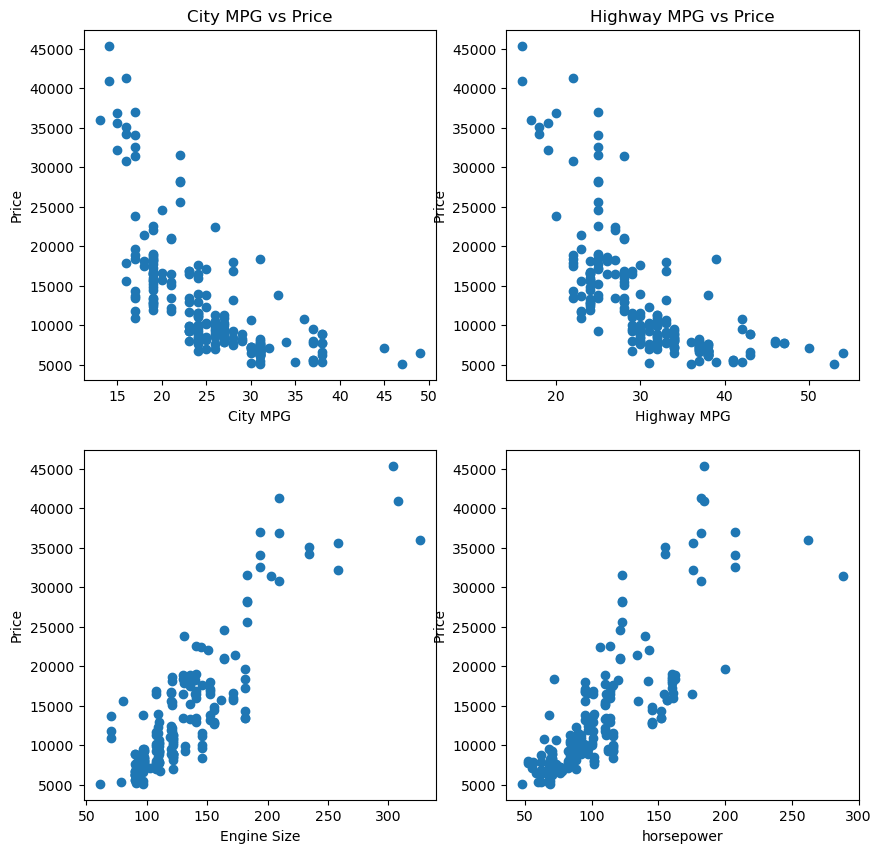

In [8]:
### Code here
# Create a subplot with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# citympg vs price
axs[0].scatter(car_price_df['citympg'], car_price_df['price'])
axs[0].set_xlabel("City MPG")
axs[0].set_ylabel("Price")
axs[0].set_title("City MPG vs Price")

# highwaympg vs price
axs[1].scatter(car_price_df['highwaympg'], car_price_df['price'])
axs[1].set_xlabel("Highway MPG")
axs[1].set_ylabel("Price")
axs[1].set_title("Highway MPG vs Price")

#enginesize vs price 
axs[2].scatter(car_price_df['enginesize'], car_price_df['price'])
axs[2].set_xlabel("Engine Size")
axs[2].set_ylabel("Price")

#horsepower vs price 
axs[3].scatter(car_price_df['horsepower'], car_price_df['price'])
axs[3].set_xlabel("horsepower")
axs[3].set_ylabel("Price")




**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [9]:
#### Comment here
# i think linear regression is a good model 
corr = car_price_X.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [25]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

In [26]:
car_price_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [27]:
from category_encoders import TargetEncoder
catCols = car_price_df.select_dtypes('object')
cat_cols = car_price_df[catCols.columns]
one_hot_encoder = pd.get_dummies(cat_cols)

encoder = TargetEncoder()
encoded_col = encoder.fit_transform(car_price_df['CarName'], car_price_df['price'])

num_cols = car_price_df.select_dtypes(include=['int64', 'float64'])

car_price_df_encoded = pd.concat([encoded_col, one_hot_encoder, num_cols], axis = 1)


In [29]:
car_price_df = car_price_df_encoded
car_price_df.head()

,CarName,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_t

In [14]:
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

In [15]:

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)   # Fit and transform scalar on X_train
car_price_X_val = scaler.transform(car_price_X_val)           # Transform X_val
car_price_X_test = scaler.transform(car_price_X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 1.         -0.3828122   0.         ...  0.83916558  0.00909065
   0.07554087]
 [ 1.          1.35737157  0.         ... -1.77525606 -0.78958775
  -0.80936648]
 [ 1.          0.6702315   0.         ...  0.00255066 -1.26879479
  -1.25182016]
 [ 1.         -0.60920741  0.         ... -0.62491054  0.16882633
   0.22302543]
 [ 1.          0.54276707  0.         ...  1.04831931 -1.10905911
  -0.95685104]] 

 42     10345.0
14     24565.0
199    18950.0
60      8495.0
117    18150.0
Name: price, dtype: float64


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [31]:
### Code here
###step 1: check all the categorical columns
catCols = car_price_df.select_dtypes("object").columns
catCols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [51]:
###step 2: apply diff encode methods to diff categorical values

# CarName: target encoding
# fueltype: one-hot encoding
# aspiration: one-hot encoding
# doornumber: one-hot encoding
# carbody: one-hot encoding
# drivewheel: one-hot encoding
# enginelocation: one-hot encoding
# enginetype: one-hot encoding
# cylindernumber: one-hot encoding
# fuelssystem: one-hot encoding

from category_encoders import TargetEncoder
te = TargetEncoder(cols = ['CarName']).fit(car_price_df,car_price_df['price'] )
car_price_df = te.transform(car_price_df).head()


In [52]:
catCols = [col for col in catCols if col != 'CarName']
# Apply one-hot encoding to the categorical columns
car_price_df = pd.get_dummies(car_price_df, columns=catCols, prefix=catCols, prefix_sep='_')


KeyError: "None of [Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',\n       'enginelocation', 'enginetype', 'fuelsystem'],\n      dtype='object')] are in the [columns]"

In [39]:
car_price_df = one_hot_encoded_df
car_price_df.shape


(5, 33)

In [37]:
car_price_df_X = car_price_df.iloc[]

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,carbody_hatchback,carbody_sedan,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_ohc,enginetype_ohcv,fuelsystem_mpfi
0,1,3,13305.111875,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,1,1,1,0,0,1
1,2,3,13696.087841,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,1,1,1,0,0,1
2,3,1,13696.087841,94.5,171.2,65.5,52.4,2823,six,152,...,1,0,0,0,1,1,0,0,1,1
3,4,2,13364.311231,99.8,176.6,66.2,54.3,2337,four,109,...,0,1,0,1,0,1,0,1,0,1
4,5,2,13887.136759,99.4,176.6,66.4,54.3,2824,five,136,...,0,1,1,0,0,1,0,1,0,1


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

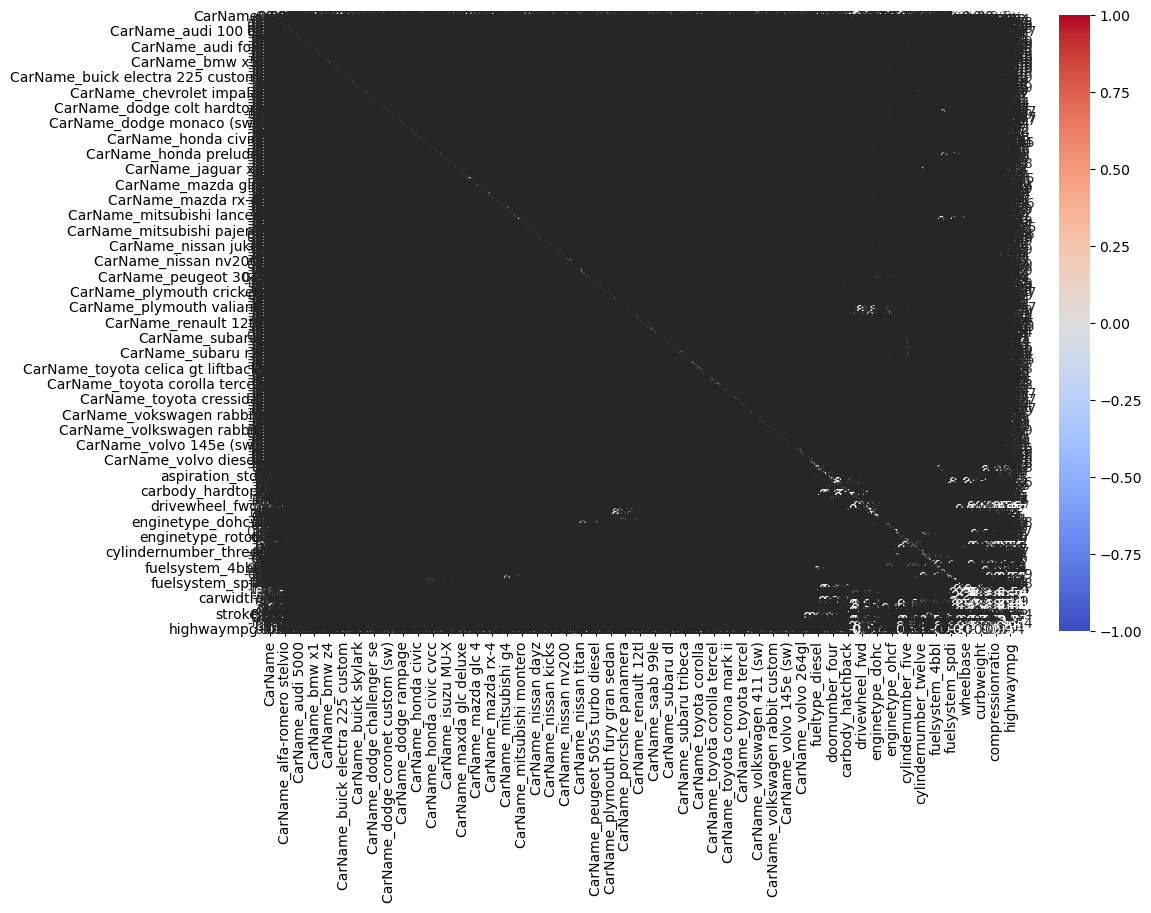

In [16]:
### Code here
corr = car_price_X.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

In [14]:
#### Comment here
# based on the heatmap we can see that none of the corr is over 0.9. It's important to drop it becasue 
# if the two features are highly related, we shouldn't use them both for a linear model, the assumption o f
# a linear model is that each variable is independent

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [32]:
### Code here
# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

ValueError: Expected 2D array, got 1D array instead:
array=[10.          3.48484848  4.6969697   6.66666667 10.45454545  8.48484848
  3.78787879 12.27272727  0.90909091  3.03030303 12.57575758  6.81818182
  5.15151515 14.6969697   5.75757576 12.12121212 14.24242424  6.21212121
  9.09090909  8.93939394  8.63636364  5.60606061  9.39393939  0.
 14.54545455  7.72727273 14.84848485 11.21212121  0.75757576 13.48484848
  0.60606061  7.57575758  9.54545455  6.51515152  7.12121212  4.09090909
  7.27272727 11.66666667  2.72727273  4.39393939  0.15151515  1.36363636
 12.42424242 10.3030303   2.27272727  5.3030303   4.84848485  7.87878788
  9.84848485 10.90909091 13.63636364 13.18181818  1.66666667  9.24242424
 11.51515152 10.15151515  1.81818182  5.90909091 12.72727273 11.96969697].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**2.1.8 Standardize the columns in the feature matrices.**

In [46]:
### Code here
# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)    

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [47]:
### Code here
# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


In [49]:
X_train.shape

(60, 3)

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [23]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        pass
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        pass
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [19]:
### Code here

**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

In [20]:
### Code here

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [21]:
### Code here

**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [22]:
### Code here

**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [25]:
### Code here

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [26]:
#### Comment here

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [28]:
### Code here

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [29]:
#### Comment here

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [8]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

NameError: name 'pd' is not defined

#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [9]:
### Code here
heart_disease_df.isnull().sum()

NameError: name 'heart_disease_df' is not defined

In [10]:
#fill all missing values with mean
cols = ['education', 'cigsPerDay','BPMeds','totChol','BMI','glucose']
heart_disease_df[cols] = heart_disease_df[cols].fillna(heart_disease_df[cols].mean())

NameError: name 'heart_disease_df' is not defined

In [40]:
heart_disease_df.select_dtypes('object').columns

Index([], dtype='object')

In [30]:
#### Comment here
#yes, there are some missing values,im just gonna fill all the missing values with mean

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

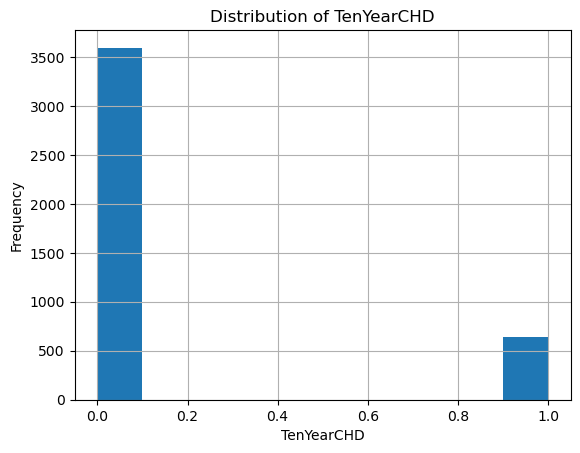

In [80]:
### Code here
#the distribution of TenYearCHD is highly imbalanced. the probability of two categories are ...
heart_disease_df['TenYearCHD'].hist()
plt.xlabel('TenYearCHD')
plt.ylabel('Frequency')
plt.title('Distribution of TenYearCHD')
plt.show()

In [30]:
#### Comment here
#its highly imbalanced 

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

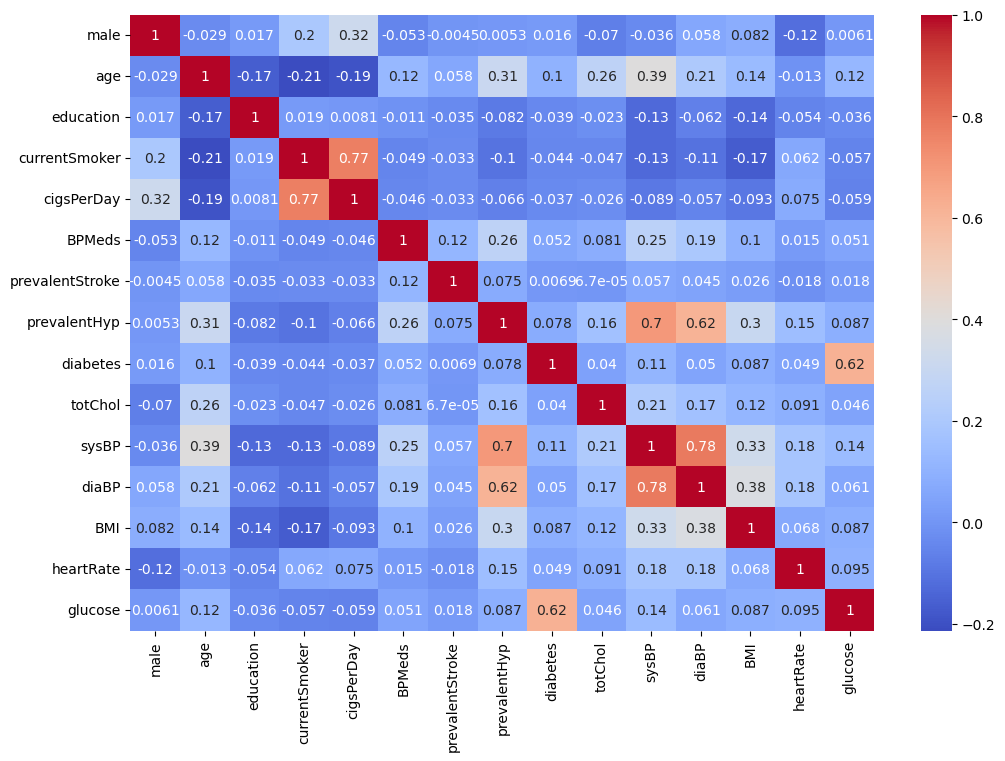

In [45]:
### Code here
X = heart_disease_df.iloc[:, :-1]
y = heart_disease_df.iloc[:, -1]
corr = X.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [31]:
#### Comment here
#all the corrs are less than 0.9, i'll keep all the features

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [46]:
### Code here
#1. convet the label from a pandas series to a Numpy(m * 1)
y = y.values
# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          1.15602641 -1.0006288   0.02127958  0.98206482  0.8884829
  -0.16937687 -0.06887004  1.48783521 -0.17073312  1.31845826 -0.00449352
   0.27504913 -0.28872931 -0.90872594 -0.28793164]
 [ 1.         -0.86503214 -0.76750641  0.99698784  0.98206482  0.8884829
  -0.16937687 -0.06887004 -0.67211745 -0.17073312  1.29515804 -1.06598044
  -0.81879209 -0.71122429  1.14993417  0.42892989]
 [ 1.         -0.86503214 -0.30126163 -0.95442868  0.98206482 -0.02745841
  -0.16937687 -0.06887004 -0.67211745 -0.17073312 -0.52225911 -0.65061599
  -0.90293372 -0.41909919 -1.32045796         nan]
 [ 1.         -0.86503214 -0.06813924  0.02127958  0.98206482  0.13907637
  -0.16937687 -0.06887004 -0.67211745 -0.17073312 -0.70866087 -1.15828366
  -0.73465045 -1.34858816 -0.90872594  0.03067349]
 [ 1.         -0.86503214 -0.88406761 -0.95442868 -1.01826272 -0.77686495
  -0.16937687 -0.06887004 -0.67211745 -0.17073312 -1.54746879 -0.88137402
  -0.31394229 -1.0878484  -0.49699392 -0.68618805]] 

 [0 

In [47]:
X.shape

(4238, 15)

In [48]:
y.shape

(4238,)

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [6]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

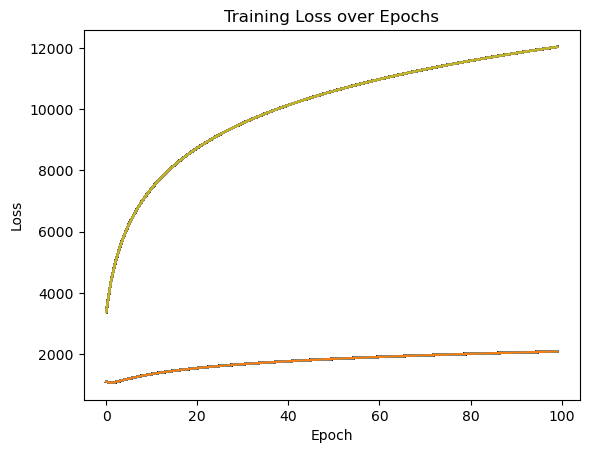

In [87]:
### Code here
logReg = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logReg.train(X_train, y_train)
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()


In [88]:
import random
def random_search(X_train, y_train, num_iters=20):
    best_alpha = 0
    best_eta = 0
    best_t = 0
    best_loss = float('inf')
    
    for i in range(num_iters):
        alpha = random.uniform(0, 1)
        eta = random.uniform(0, 0.001)
        t = random.randint(0, 100)
        
        model = LogisticRegression(alpha=alpha, t=t, eta=eta)
        losses = model.train(X_train, y_train)
        avg_loss = np.mean(losses)
        
        if avg_loss < best_loss:
            best_alpha = alpha
            best_eta = eta
            best_t = t
            best_loss = avg_loss
    
    return best_alpha, best_eta, best_t

In [89]:
best_alpha, best_eta, best_t = random_search(X_train, y_train)
print("Best alpha:", best_alpha)
print("Best eta: ", best_eta)
print("Best t: ", best_t)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best alpha: 0.03266190667907265
Best eta:  8.88635685798569e-05
Best t:  68


In [7]:
logReg = LogisticRegression(alpha=0.0326, t=68, eta=8.89)
loss = logReg.train(X_train, y_train)
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()


NameError: name 'X_train' is not defined

**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [34]:
#### Comment here

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [95]:
np.isnan(X_train.any()) #and gets False
np.isnan(y_train.any())

False

In [115]:
car_price_X.values

array([[1, 3, 'alfa-romero giulia', ..., 5000, 21, 27],
       [2, 3, 'alfa-romero stelvio', ..., 5000, 21, 27],
       [3, 1, 'alfa-romero Quadrifoglio', ..., 5000, 19, 26],
       ...,
       [203, -1, 'volvo 244dl', ..., 5500, 18, 23],
       [204, -1, 'volvo 246', ..., 4800, 26, 27],
       [205, -1, 'volvo 264gl', ..., 5400, 19, 25]], dtype=object)

In [117]:
### Code here
from sklearn import svm
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(car_price_X_train, car_price_y_train)

# val_accuracy = clf.score(car_price_X_val, car_price_y_val)
# Evaluate the SVM on the testing data
# test_accuracy = clf.score(X_test, y_test)

# Print the results
print("Validation Accuracy:", val_accuracy)
# print("Test Accuracy:", test_accuracy)

ValueError: could not convert string to float: 'honda civic (auto)'

In [98]:
#### Comment here


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [28]:
### Code here

### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [28]:
### Code here